In [2]:
import json

In [81]:
with open('550w.json', 'r') as f:
    data = json.load(f)

In [82]:
for key, value in data.items():
    print(f"Key: {key}, Value Type: {type(value)}")

Key: name, Value Type: <class 'str'>
Key: center, Value Type: <class 'dict'>
Key: imageryDate, Value Type: <class 'dict'>
Key: postalCode, Value Type: <class 'str'>
Key: administrativeArea, Value Type: <class 'str'>
Key: statisticalArea, Value Type: <class 'str'>
Key: regionCode, Value Type: <class 'str'>
Key: solarPotential, Value Type: <class 'dict'>
Key: boundingBox, Value Type: <class 'dict'>
Key: imageryQuality, Value Type: <class 'str'>
Key: imageryProcessedDate, Value Type: <class 'dict'>


In [83]:
bounding_box_data = data['boundingBox']
bounding_box_structure = {key: type(value).__name__ for key, value in bounding_box_data.items()}
print(bounding_box_structure)

{'sw': 'dict', 'ne': 'dict'}


In [86]:
sw_data = bounding_box_data['sw']
ne_data = bounding_box_data['ne']
sw_structure = {key: type(value).__name__ for key, value in sw_data.items()}
ne_structure = {key: type(value).__name__ for key, value in ne_data.items()}

sw_data = bounding_box_data['sw']
ne_data = bounding_box_data['ne']
sw_lat, sw_long = sw_data['latitude'], sw_data['longitude']
ne_lat, ne_long = ne_data['latitude'], ne_data['longitude']
print(f"SW: ({sw_lat}, {sw_long}), NE: ({ne_lat}, {ne_long})")

SW: (32.7500937, -117.16079260000001), NE: (32.750606499999996, -117.1598182)


In [89]:
import folium
import math

# Function to rotate a point
def rotate_point(x, y, angle_degrees, cx, cy):
    angle_radians = math.radians(angle_degrees)
    dx = x - cx
    dy = y - cy
    rotated_dx = dx * math.cos(angle_radians) - dy * math.sin(angle_radians)
    rotated_dy = dx * math.sin(angle_radians) + dy * math.cos(angle_radians)
    return cx + rotated_dx, cy + rotated_dy

# Calculate the midpoint of the bounding box
mid_lat, mid_long = (sw_lat + ne_lat) / 2, (sw_long + ne_long) / 2

# Calculate scaling factor based on latitude
scale_factor = math.cos(math.radians(mid_lat))

# Adjust the deltas based on the scaling factor
scaled_delta_lat = (ne_lat - sw_lat) / scale_factor
scaled_delta_long = ne_long - sw_long

# Check if rotation is needed
rotation_needed = abs(scaled_delta_lat - scaled_delta_long) > 0.01  # Set a suitable threshold

# Initialize points to original coordinates
rotated_sw = (sw_lat, sw_long)
rotated_ne = (ne_lat, ne_long)
rotated_se = (ne_lat, sw_long)
rotated_nw = (sw_lat, ne_long)

if rotation_needed:
    # Calculate the angle of rotation based on the adjusted deltas
    angle_degrees = math.degrees(math.atan2(scaled_delta_lat, scaled_delta_long))

    # Rotate each corner of the bounding box
    rotated_sw = rotate_point(sw_lat / scale_factor, sw_long, angle_degrees, mid_lat / scale_factor, mid_long)
    rotated_ne = rotate_point(ne_lat / scale_factor, ne_long, angle_degrees, mid_lat / scale_factor, mid_long)
    rotated_se = rotate_point(ne_lat / scale_factor, sw_long, angle_degrees, mid_lat / scale_factor, mid_long)
    rotated_nw = rotate_point(sw_lat / scale_factor, ne_long, angle_degrees, mid_lat / scale_factor, mid_long)

    # Rescale the rotated coordinates back to the original scale
    rotated_sw = (rotated_sw[0] * scale_factor, rotated_sw[1])
    rotated_ne = (rotated_ne[0] * scale_factor, rotated_ne[1])
    rotated_se = (rotated_se[0] * scale_factor, rotated_se[1])
    rotated_nw = (rotated_nw[0] * scale_factor, rotated_nw[1])

# Initialize the folium map centered around the bounding box
zoom_level = 6  # Adjust as needed
m = folium.Map(location=[mid_lat, mid_long], zoom_start=zoom_level)

# Draw the rotated bounding box as a polygon
folium.Polygon([rotated_sw, rotated_se, rotated_ne, rotated_nw, rotated_sw], 
               color='red').add_to(m)

# Show the map
m


In [91]:
for key, value in data.items():
    print(f"Key: {key}, Value Type: {type(value)}")

Key: name, Value Type: <class 'str'>
Key: center, Value Type: <class 'dict'>
Key: imageryDate, Value Type: <class 'dict'>
Key: postalCode, Value Type: <class 'str'>
Key: administrativeArea, Value Type: <class 'str'>
Key: statisticalArea, Value Type: <class 'str'>
Key: regionCode, Value Type: <class 'str'>
Key: solarPotential, Value Type: <class 'dict'>
Key: boundingBox, Value Type: <class 'dict'>
Key: imageryQuality, Value Type: <class 'str'>
Key: imageryProcessedDate, Value Type: <class 'dict'>


In [92]:
solarPotential_data = data['solarPotential']
solarPotential_structure = {key: type(value).__name__ for key, value in solarPotential_data.items()}
print(solarPotential_structure)

{'maxArrayPanelsCount': 'int', 'maxArrayAreaMeters2': 'float', 'maxSunshineHoursPerYear': 'float', 'carbonOffsetFactorKgPerMwh': 'float', 'wholeRoofStats': 'dict', 'roofSegmentStats': 'list', 'solarPanelConfigs': 'list', 'financialAnalyses': 'list', 'panelCapacityWatts': 'int', 'panelHeightMeters': 'float', 'panelWidthMeters': 'float', 'panelLifetimeYears': 'int', 'buildingStats': 'dict', 'solarPanels': 'list'}


In [93]:
def explore_nested_dict(d, indent=0, max_samples=3):
    """Recursively explore nested dictionaries."""
    for key, value in d.items():
        print('  ' * indent + f"Key: {key}, Type: {type(value)}")
        
        if isinstance(value, dict):
            explore_nested_dict(value, indent + 1)
            
        elif isinstance(value, list):
            print('  ' * (indent + 1) + f"List Length: {len(value)}")
            
            # Show a few sample values
            samples = value[:max_samples]
            for i, sample in enumerate(samples):
                print('  ' * (indent + 1) + f"Sample {i+1}: {sample}")
                


# Start the exploration
print("Exploring 'solarPotential' Dictionary:")
explore_nested_dict(solarPotential_data)


Exploring 'solarPotential' Dictionary:
Key: maxArrayPanelsCount, Type: <class 'int'>
Key: maxArrayAreaMeters2, Type: <class 'float'>
Key: maxSunshineHoursPerYear, Type: <class 'float'>
Key: carbonOffsetFactorKgPerMwh, Type: <class 'float'>
Key: wholeRoofStats, Type: <class 'dict'>
  Key: areaMeters2, Type: <class 'float'>
  Key: sunshineQuantiles, Type: <class 'list'>
    List Length: 11
    Sample 1: 307.60037
    Sample 2: 831.406
    Sample 3: 1144.937
  Key: groundAreaMeters2, Type: <class 'float'>
Key: roofSegmentStats, Type: <class 'list'>
  List Length: 42
  Sample 1: {'pitchDegrees': 0.05455951, 'azimuthDegrees': 0, 'stats': {'areaMeters2': 783.5704, 'sunshineQuantiles': [404.24756, 1365.3676, 1448.5568, 1488.6694, 1519.8843, 1544.2362, 1560.923, 1575.2241, 1595.3922, 1613.7877, 1672.3453], 'groundAreaMeters2': 783.57}, 'center': {'latitude': 32.7504469, 'longitude': -117.16007229999998}, 'boundingBox': {'sw': {'latitude': 32.750347, 'longitude': -117.16028879999999}, 'ne': {'l

In [94]:
# Extract 'solarPanels' list from the main 'data' dictionary
solar_panels_data = solarPotential_data.get('solarPanels', [])

# Print the number of items in the list
print(f"Number of items in 'solarPanels': {len(solar_panels_data)}")

# Loop through a few samples in the list to understand its layout
for i, sample in enumerate(solar_panels_data):  # Adjust the slice for more or fewer samples
    print(f"\nSample {i+1}:")
    for key, value in sample.items():
        print(f"  Key: {key}, Value: {value}, Type: {type(value).__name__}")


Number of items in 'solarPanels': 1128

Sample 1:
  Key: center, Value: {'latitude': 32.7501702, 'longitude': -117.1604836}, Type: dict
  Key: orientation, Value: LANDSCAPE, Type: str
  Key: yearlyEnergyDcKwh, Value: 451.42062, Type: float
  Key: segmentIndex, Value: 1, Type: int

Sample 2:
  Key: center, Value: {'latitude': 32.7501702, 'longitude': -117.160466}, Type: dict
  Key: orientation, Value: LANDSCAPE, Type: str
  Key: yearlyEnergyDcKwh, Value: 451.21643, Type: float
  Key: segmentIndex, Value: 1, Type: int

Sample 3:
  Key: center, Value: {'latitude': 32.7501612, 'longitude': -117.1604836}, Type: dict
  Key: orientation, Value: LANDSCAPE, Type: str
  Key: yearlyEnergyDcKwh, Value: 451.18182, Type: float
  Key: segmentIndex, Value: 1, Type: int

Sample 4:
  Key: center, Value: {'latitude': 32.750152299999996, 'longitude': -117.1604836}, Type: dict
  Key: orientation, Value: LANDSCAPE, Type: str
  Key: yearlyEnergyDcKwh, Value: 450.9286, Type: float
  Key: segmentIndex, Value: 

Number of items in 'solarPanels': 1128


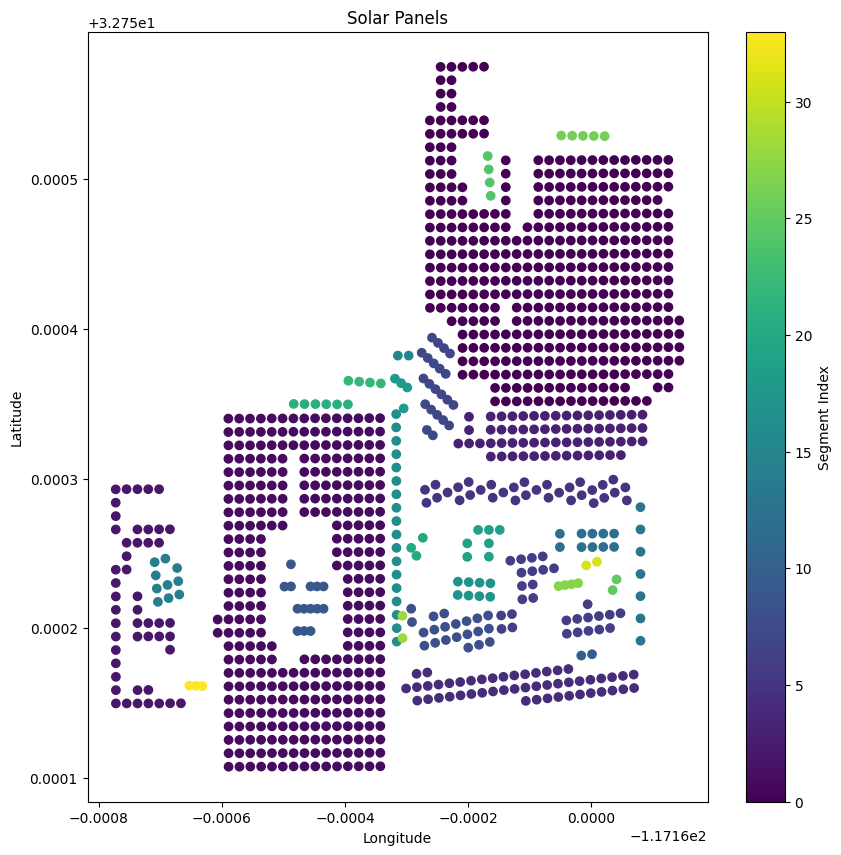

In [95]:
import matplotlib.pyplot as plt

# Initialize an empty list to store the solar panels data
solar_panels_data = []

# Extract 'solarPanels' list from the main 'data' dictionary
solar_panels_list = solarPotential_data.get('solarPanels', [])

# Loop through the list to construct solar_panels_data
for sample in solar_panels_list:
    sample_dict = {
        'center': sample.get('center', {}),
        'orientation': sample.get('orientation', ''),
        'yearlyEnergyDcKwh': sample.get('yearlyEnergyDcKwh', 0.0),
        'segmentIndex': sample.get('segmentIndex', 0)
    }
    solar_panels_data.append(sample_dict)

# Output the number of items in the list for verification
print(f"Number of items in 'solarPanels': {len(solar_panels_data)}")
# Prepare the coordinates for plotting
latitudes = [sample['center']['latitude'] for sample in solar_panels_data]
longitudes = [sample['center']['longitude'] for sample in solar_panels_data]
colors = [sample['segmentIndex'] for sample in solar_panels_data]

# Create the plot
plt.figure(figsize=(10, 10))
sc = plt.scatter(longitudes, latitudes, c=colors, cmap='viridis')

# Add color bar to indicate segmentIndex
plt.colorbar(sc, label='Segment Index')

# Labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Solar Panels')

# Show the plot
plt.show()


In [96]:
# Extract 'wholeRoofStats' from the 'solarPotential_data'
whole_roof_stats = solarPotential_data.get('wholeRoofStats', {})


# If you also want to see the values, you can do so as follows:
for key, value in whole_roof_stats.items():
    print(f"Key: {key}, Value: {value}")



Key: areaMeters2, Value: 2673.805
Key: sunshineQuantiles, Value: [307.60037, 831.406, 1144.937, 1306.7112, 1410.4089, 1490.4583, 1546.7115, 1585.9126, 1633.9734, 1751.8065, 1965.6041]
Key: groundAreaMeters2, Value: 2636.09


In [97]:


# Access the 'solarPanelConfigs' list
solar_panel_configs = solarPotential_data.get('solarPanelConfigs', [])

# Loop through each configuration and print it
for i, config in enumerate(solar_panel_configs):
    print(f"Panel Config {i+1}: {config}")


Panel Config 1: {'panelsCount': 4, 'yearlyEnergyDcKwh': 1804.7474, 'roofSegmentSummaries': [{'pitchDegrees': 0.06557688, 'azimuthDegrees': 0, 'panelsCount': 4, 'yearlyEnergyDcKwh': 1804.7474, 'segmentIndex': 1}]}
Panel Config 2: {'panelsCount': 5, 'yearlyEnergyDcKwh': 2255.6924, 'roofSegmentSummaries': [{'pitchDegrees': 0.06557688, 'azimuthDegrees': 0, 'panelsCount': 5, 'yearlyEnergyDcKwh': 2255.6924, 'segmentIndex': 1}]}
Panel Config 3: {'panelsCount': 6, 'yearlyEnergyDcKwh': 2706.5295, 'roofSegmentSummaries': [{'pitchDegrees': 0.06557688, 'azimuthDegrees': 0, 'panelsCount': 6, 'yearlyEnergyDcKwh': 2706.5295, 'segmentIndex': 1}]}
Panel Config 4: {'panelsCount': 7, 'yearlyEnergyDcKwh': 3157.2498, 'roofSegmentSummaries': [{'pitchDegrees': 0.06557688, 'azimuthDegrees': 0, 'panelsCount': 7, 'yearlyEnergyDcKwh': 3157.2498, 'segmentIndex': 1}]}
Panel Config 5: {'panelsCount': 8, 'yearlyEnergyDcKwh': 3607.6287, 'roofSegmentSummaries': [{'pitchDegrees': 0.06557688, 'azimuthDegrees': 0, 'panel

In [21]:
# Code to explore all entries under 'financialAnalyses'
def explore_financialAnalyses(financialAnalyses_list):
    # Initialize an empty list to store the structures of each entry
    all_structures = []
    
    # Loop through each entry in 'financialAnalyses'
    for i, entry in enumerate(financialAnalyses_list):
        # Extract the structure of the current entry
        current_structure = {key: type(value).__name__ for key, value in entry.items()}
        
        # Append the current structure to the list of all structures
        all_structures.append(current_structure)
    
    return all_structures

# Extract the 'financialAnalyses' list from the 'solarPotential' data
financialAnalyses_list = solarPotential_data['financialAnalyses']

# Get the structures of all entries under 'financialAnalyses'
all_financialAnalyses_structures = explore_financialAnalyses(financialAnalyses_list)
all_financialAnalyses_structures[:5]  # Displaying the first 5 entries for illustration


[{'monthlyBill': 'dict', 'panelConfigIndex': 'int'},
 {'monthlyBill': 'dict', 'panelConfigIndex': 'int'},
 {'monthlyBill': 'dict',
  'panelConfigIndex': 'int',
  'financialDetails': 'dict',
  'leasingSavings': 'dict',
  'cashPurchaseSavings': 'dict',
  'financedPurchaseSavings': 'dict'},
 {'monthlyBill': 'dict',
  'panelConfigIndex': 'int',
  'financialDetails': 'dict',
  'leasingSavings': 'dict',
  'cashPurchaseSavings': 'dict',
  'financedPurchaseSavings': 'dict'},
 {'monthlyBill': 'dict',
  'panelConfigIndex': 'int',
  'financialDetails': 'dict',
  'leasingSavings': 'dict',
  'cashPurchaseSavings': 'dict',
  'financedPurchaseSavings': 'dict'}]

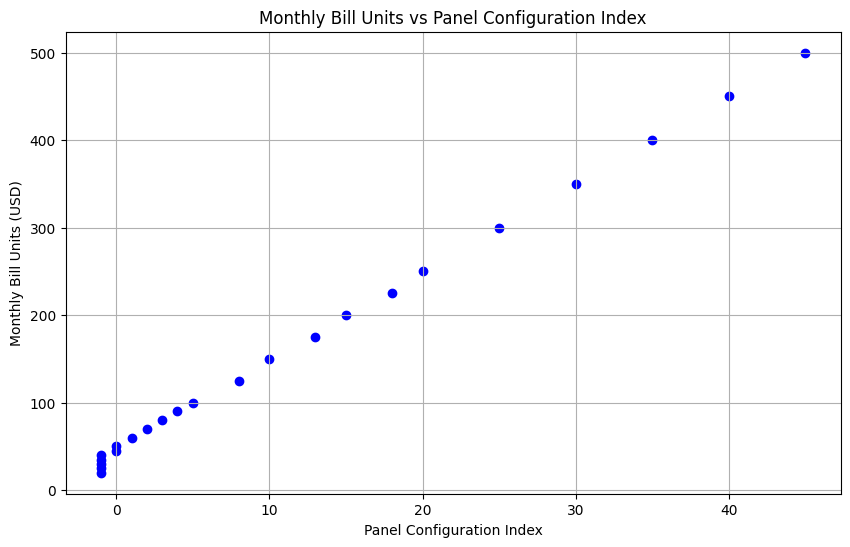

In [98]:
import matplotlib.pyplot as plt
import pandas as pd

financialAnalyses_data = solarPotential_data['financialAnalyses']
# Convert the list of financial analyses to a DataFrame
financial_df = pd.DataFrame(financialAnalyses_data)

# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Extracting the 'units' from 'monthlyBill' and 'panelConfigIndex' for all entries
monthlyBill_units = [float(item['monthlyBill']['units']) for item in financialAnalyses_data]
panelConfigIndex_values = [item['panelConfigIndex'] for item in financialAnalyses_data]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.scatter(panelConfigIndex_values, monthlyBill_units, marker='o', color='b')
plt.title('Monthly Bill Units vs Panel Configuration Index')
plt.xlabel('Panel Configuration Index')
plt.ylabel('Monthly Bill Units (USD)')
plt.grid(True)
plt.show()

In [99]:
# Accessing the 'roofSegmentStats' from the 'solarPotential_data' dictionary
roofSegmentStats_data = solarPotential_data.get('roofSegmentStats', None)

# Printing the structure and a few samples for illustration
if roofSegmentStats_data is not None:
    print(f"Type: {type(roofSegmentStats_data)}")
    print(f"List Length: {len(roofSegmentStats_data)}")
    print("Sample Data:")
    for i, sample in enumerate(roofSegmentStats_data):  # Showing first 3 samples
        print(f"Sample {i+1}: {sample}")
else:
    print("Key 'roofSegmentStats' not found.")

Type: <class 'list'>
List Length: 42
Sample Data:
Sample 1: {'pitchDegrees': 0.05455951, 'azimuthDegrees': 0, 'stats': {'areaMeters2': 783.5704, 'sunshineQuantiles': [404.24756, 1365.3676, 1448.5568, 1488.6694, 1519.8843, 1544.2362, 1560.923, 1575.2241, 1595.3922, 1613.7877, 1672.3453], 'groundAreaMeters2': 783.57}, 'center': {'latitude': 32.7504469, 'longitude': -117.16007229999998}, 'boundingBox': {'sw': {'latitude': 32.750347, 'longitude': -117.16028879999999}, 'ne': {'latitude': 32.750606399999995, 'longitude': -117.15983460000001}}, 'planeHeightAtCenterMeters': 86.75248}
Sample 2: {'pitchDegrees': 0.06557688, 'azimuthDegrees': 0, 'stats': {'areaMeters2': 683.45044, 'sunshineQuantiles': [307.60037, 1333.725, 1514.0968, 1614.9642, 1670.256, 1705.4027, 1739.6516, 1774.3353, 1796.3524, 1801.1565, 1965.6041], 'groundAreaMeters2': 683.45}, 'center': {'latitude': 32.7502218, 'longitude': -117.16046580000001}, 'boundingBox': {'sw': {'latitude': 32.750094, 'longitude': -117.16061599999998}

/tmp/ipykernel_5087/1710955717.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([sw[1], ne[1]], [sw[0], ne[0]], c=color, zorder=5)


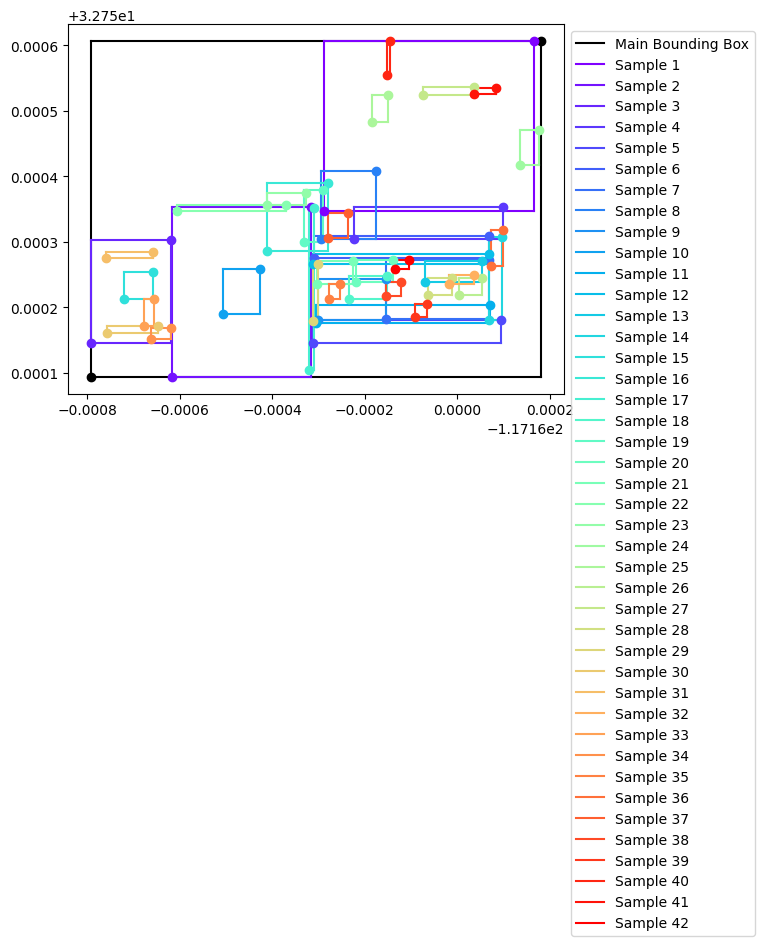

In [101]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



# Extract 'roofSegmentStats' list from 'solarPotential' dictionary
roofSegmentStats = data['solarPotential']['roofSegmentStats']

# Create a color map
n_samples = len(roofSegmentStats)
colors = cm.rainbow(np.linspace(0, 1, n_samples))

# Extract main bounding box coordinates
main_bounding_box = data['boundingBox']
main_sw = (main_bounding_box['sw']['latitude'], main_bounding_box['sw']['longitude'])
main_ne = (main_bounding_box['ne']['latitude'], main_bounding_box['ne']['longitude'])

# Plot main bounding box
plt.plot([main_sw[1], main_ne[1]], [main_sw[0], main_sw[0]], 'k-', label='Main Bounding Box')
plt.plot([main_sw[1], main_ne[1]], [main_ne[0], main_ne[0]], 'k-')
plt.plot([main_sw[1], main_sw[1]], [main_sw[0], main_ne[0]], 'k-')
plt.plot([main_ne[1], main_ne[1]], [main_sw[0], main_ne[0]], 'k-')

# Highlight main SW and NE points
plt.scatter([main_sw[1], main_ne[1]], [main_sw[0], main_ne[0]], c='k', zorder=5)

# Plot sample bounding boxes
for i, segment in enumerate(roofSegmentStats):
    sw = (segment['boundingBox']['sw']['latitude'], segment['boundingBox']['sw']['longitude'])
    ne = (segment['boundingBox']['ne']['latitude'], segment['boundingBox']['ne']['longitude'])
    color = colors[i]
    
    plt.plot([sw[1], ne[1]], [sw[0], sw[0]], color=color)
    plt.plot([sw[1], ne[1]], [ne[0], ne[0]], color=color)
    plt.plot([sw[1], sw[1]], [sw[0], ne[0]], color=color, label=f'Sample {i+1}')
    plt.plot([ne[1], ne[1]], [sw[0], ne[0]], color=color)

    # Highlight SW and NE points
    plt.scatter([sw[1], ne[1]], [sw[0], ne[0]], c=color, zorder=5)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.show()


In [102]:


# Extract heights of each sample and store in a list
sample_heights = []
for i, segment in enumerate(roofSegmentStats):
    height = segment.get('planeHeightAtCenterMeters', None)
    if height is not None:
        sample_heights.append(height)
        print(f"Height of Sample {i+1}: {height} meters")

Height of Sample 1: 86.75248 meters
Height of Sample 2: 119.97981 meters
Height of Sample 3: 90.67694 meters
Height of Sample 4: 86.823906 meters
Height of Sample 5: 90.67404 meters
Height of Sample 6: 90.67134 meters
Height of Sample 7: 90.78359 meters
Height of Sample 8: 86.94469 meters
Height of Sample 9: 90.72586 meters
Height of Sample 10: 125.13526 meters
Height of Sample 11: 92.414856 meters
Height of Sample 12: 92.271385 meters
Height of Sample 13: 90.702576 meters
Height of Sample 14: 90.66252 meters
Height of Sample 15: 92.27957 meters
Height of Sample 16: 91.86135 meters
Height of Sample 17: 120.47654 meters
Height of Sample 18: 92.37984 meters
Height of Sample 19: 91.046745 meters
Height of Sample 20: 90.75917 meters
Height of Sample 21: 90.76709 meters
Height of Sample 22: 120.53238 meters
Height of Sample 23: 91.11067 meters
Height of Sample 24: 87.71332 meters
Height of Sample 25: 87.640724 meters
Height of Sample 26: 92.09734 meters
Height of Sample 27: 87.968025 meters

Sample 6 and Sample 14 are touching but not overlapping.
Sample 27 and Sample 41 are touching but not overlapping.
Sample 30 and Sample 33 are touching but not overlapping.


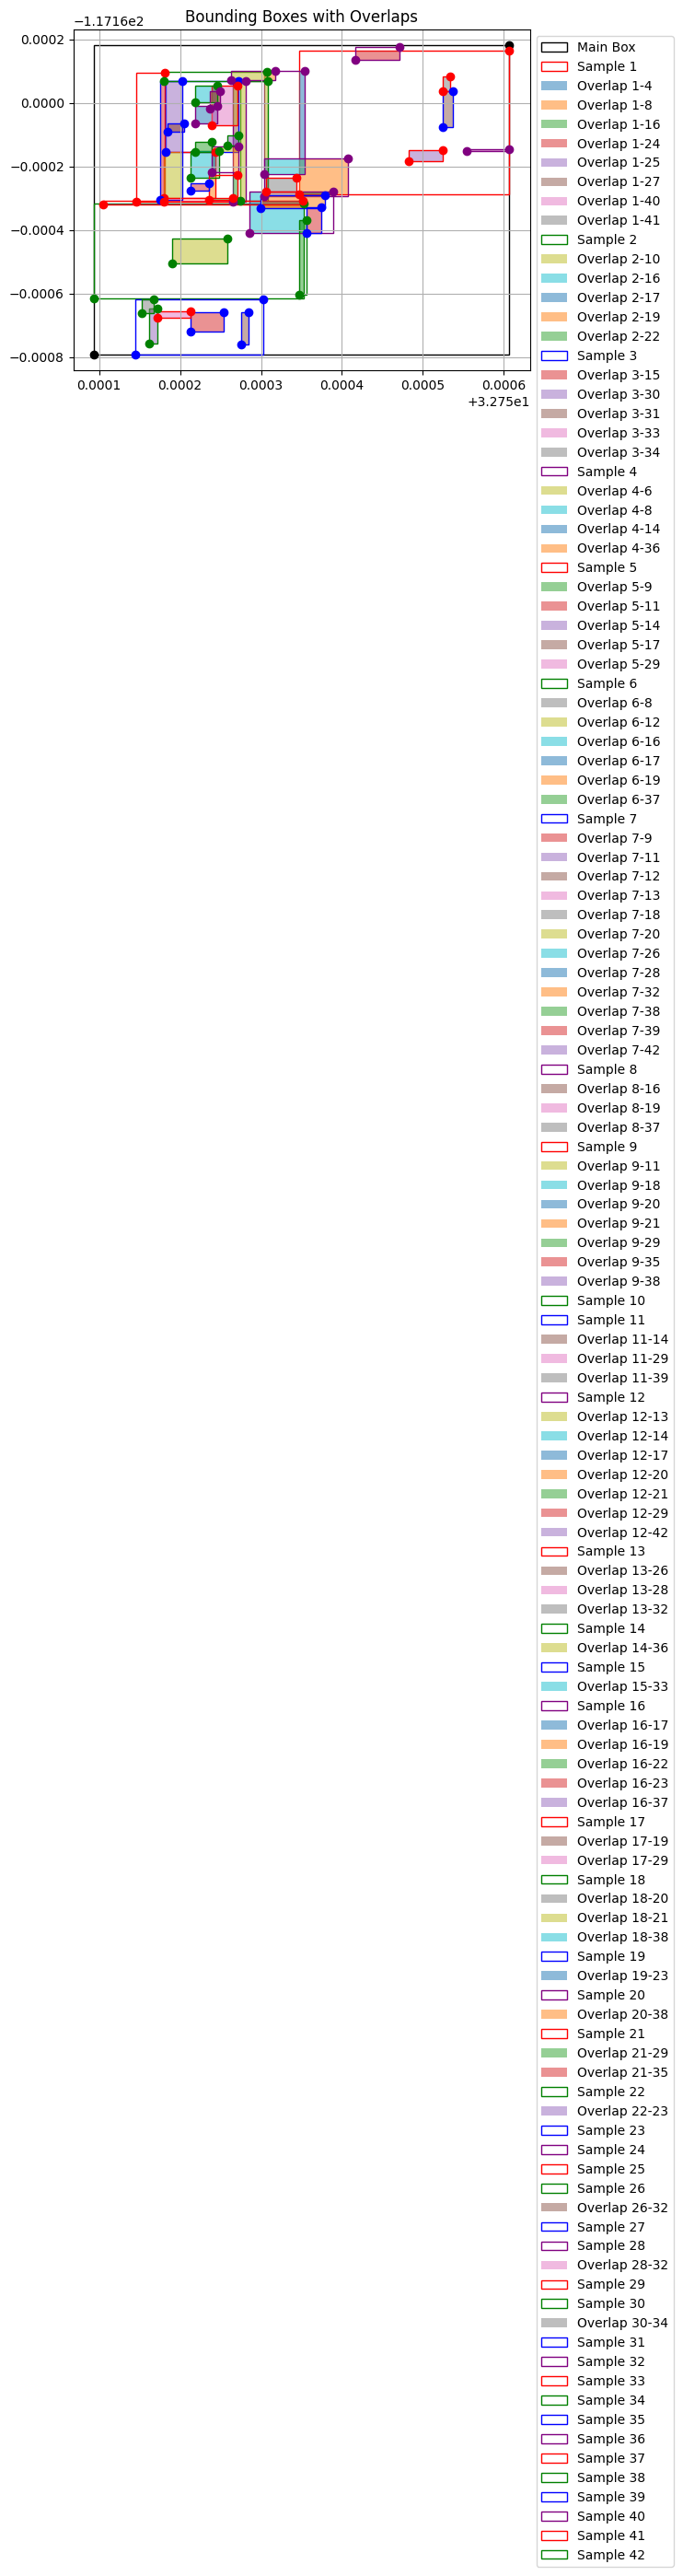

In [104]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_box(ax, box, label, edgecolor, facecolor='none'):
    xmin, ymin, xmax, ymax = box
    ax.add_patch(
        patches.Rectangle(
            (xmin, ymin), xmax - xmin, ymax - ymin,
            linewidth=1, edgecolor=edgecolor, facecolor=facecolor, label=label
        )
    )
    ax.scatter([xmin, xmax], [ymin, ymax], c=edgecolor, zorder=5)

# Extract main bounding box
main_box_data = data['boundingBox']
main_box = [main_box_data['sw']['latitude'], main_box_data['sw']['longitude'], 
            main_box_data['ne']['latitude'], main_box_data['ne']['longitude']]

# Extract sample boxes
sample_boxes_data = data['solarPotential']['roofSegmentStats']
sample_boxes = []
for sample in sample_boxes_data:
    box = sample['boundingBox']
    sample_boxes.append([box['sw']['latitude'], box['sw']['longitude'], 
                         box['ne']['latitude'], box['ne']['longitude']])

# Create shapely polygons for sample boxes
polygons = [Polygon([(box[0], box[1]), (box[0], box[3]), (box[2], box[3]), (box[2], box[1])]) for box in sample_boxes]

# Initialize plot
fig, ax = plt.subplots()

# Draw main bounding box
draw_box(ax, main_box, 'Main Box', 'black')

# Draw sample bounding boxes and find intersections
colors = ['red', 'green', 'blue', 'purple']
for i, (box, poly1) in enumerate(zip(sample_boxes, polygons)):
    draw_box(ax, box, f'Sample {i+1}', colors[i % len(colors)])
    
    # Find intersection with other sample boxes and add to plot
    for j, poly2 in enumerate(polygons[i+1:], start=i+1):
        intersection = poly1.intersection(poly2)
        
        if intersection.is_empty:
            continue

        if intersection.geom_type == 'Polygon':
            x, y = intersection.exterior.xy
            ax.fill(x, y, alpha=0.5, label=f'Overlap {i+1}-{j+1}')
        elif intersection.geom_type in ['LineString', 'Point']:
            print(f"Sample {i+1} and Sample {j+1} are touching but not overlapping.")

# Annotations and Grid
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.title('Bounding Boxes with Overlaps')
plt.show()


In [105]:
import math

# Function to calculate distance between two latitude-longitude points
def calculate_distance(coord1, coord2):
    R = 6371000  # Radius of Earth in meters
    lat1, lon1 = math.radians(coord1[0]), math.radians(coord1[1])
    lat2, lon2 = math.radians(coord2[0]), math.radians(coord2[1])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    
    return R * c

# Extract sample boxes
sample_boxes_data = data['solarPotential']['roofSegmentStats']

# Calculate and compare areas
for i, sample in enumerate(sample_boxes_data):
    box = sample['boundingBox']
    sw = (box['sw']['latitude'], box['sw']['longitude'])
    ne = (box['ne']['latitude'], box['ne']['longitude'])
    
    # Calculate area of bounding box in meters^2
    width = calculate_distance((sw[0], sw[1]), (ne[0], sw[1]))
    height = calculate_distance((sw[0], sw[1]), (sw[0], ne[1]))
    bounding_box_area = width * height
    
    # Extract areaMeters2 and groundAreaMeters2 from JSON
    area_meters2 = sample['stats']['areaMeters2']
    ground_area_meters2 = sample['stats']['groundAreaMeters2']
    
    print(f"Sample {i+1}")
    print(f"Calculated Bounding Box Area: {bounding_box_area} m^2")
    print(f"areaMeters2 from JSON: {area_meters2} m^2")
    print(f"groundAreaMeters2 from JSON: {ground_area_meters2} m^2")
    print("---")

Sample 1
Calculated Bounding Box Area: 1225.1845085089376 m^2
areaMeters2 from JSON: 783.5704 m^2
groundAreaMeters2 from JSON: 783.57 m^2
---
Sample 2
Calculated Bounding Box Area: 806.7283938705528 m^2
areaMeters2 from JSON: 683.45044 m^2
groundAreaMeters2 from JSON: 683.45 m^2
---
Sample 3
Calculated Bounding Box Area: 284.57081241985765 m^2
areaMeters2 from JSON: 145.55109 m^2
groundAreaMeters2 from JSON: 145.55 m^2
---
Sample 4
Calculated Bounding Box Area: 168.5896252067923 m^2
areaMeters2 from JSON: 128.95438 m^2
groundAreaMeters2 from JSON: 128.83 m^2
---
Sample 5
Calculated Bounding Box Area: 146.81472905229788 m^2
areaMeters2 from JSON: 115.45634 m^2
groundAreaMeters2 from JSON: 115.43 m^2
---
Sample 6
Calculated Bounding Box Area: 133.21117449721066 m^2
areaMeters2 from JSON: 99.23001 m^2
groundAreaMeters2 from JSON: 99.22 m^2
---
Sample 7
Calculated Bounding Box Area: 208.8803970502747 m^2
areaMeters2 from JSON: 98.240486 m^2
groundAreaMeters2 from JSON: 98.22 m^2
---
Sample

In [106]:
def greedy_panel_fitting(samples):
    """Calculate the maximum number of panels that can fit in each sample using a Greedy Method."""
    
    panel_count_per_sample = {}  # Dictionary to hold the number of panels that can fit in each sample
    panel_width = 65  # Width of the panel in inches
    panel_height = 39  # Height of the panel in inches

    # Loop through each sample to calculate the number of panels that can fit
    for i, sample in enumerate(samples):
        # Extract the coordinates for the South-West and North-East corners of the bounding box
        sw_lat, sw_lon = sample['boundingBox']['sw']['latitude'], sample['boundingBox']['sw']['longitude']
        ne_lat, ne_lon = sample['boundingBox']['ne']['latitude'], sample['boundingBox']['ne']['longitude']

        # Convert latitude and longitude to a Cartesian coordinate system
        # For simplicity, assume 1 degree latitude or longitude is approximately 69 miles,
        # and 1 mile is 63360 inches
        width = abs(ne_lon - sw_lon) * 69 * 63360  # Width of the bounding box in inches
        height = abs(ne_lat - sw_lat) * 69 * 63360  # Height of the bounding box in inches

        # Calculate how many panels can fit along the width and height of the bounding box
        panels_in_width = int(width // panel_width)
        panels_in_height = int(height // panel_height)

        # Calculate the total number of panels that can fit in this bounding box
        total_panels = panels_in_width * panels_in_height

        # Store the result in the dictionary
        panel_count_per_sample[f"Sample_{i+1}"] = total_panels

    return panel_count_per_sample

# Extract 'roofSegmentStats' from the 'solarPotential_data'
roof_segment_stats = solarPotential_data.get('roofSegmentStats', [])

# Initialize an empty list to hold the samples
samples = []

# Loop through each segment to extract the bounding box information
for segment in roof_segment_stats:
    bounding_box = segment.get('boundingBox', {})
    sample = {'boundingBox': bounding_box}
    samples.append(sample)


# Run the Greedy Method to find the number of panels that can fit in each sample
result = greedy_panel_fitting(samples)
print("Total number of panels that can fit in each sample:", result)

Total number of panels that can fit in each sample: {'Sample_1': 870, 'Sample_2': 580, 'Sample_3': 187, 'Sample_4': 105, 'Sample_5': 81, 'Sample_6': 75, 'Sample_7': 140, 'Sample_8': 77, 'Sample_9': 63, 'Sample_10': 35, 'Sample_11': 75, 'Sample_12': 25, 'Sample_13': 24, 'Sample_14': 14, 'Sample_15': 16, 'Sample_16': 88, 'Sample_17': 0, 'Sample_18': 15, 'Sample_19': 16, 'Sample_20': 15, 'Sample_21': 15, 'Sample_22': 15, 'Sample_23': 10, 'Sample_24': 12, 'Sample_25': 8, 'Sample_26': 9, 'Sample_27': 7, 'Sample_28': 9, 'Sample_29': 0, 'Sample_30': 7, 'Sample_31': 6, 'Sample_32': 3, 'Sample_33': 4, 'Sample_34': 2, 'Sample_35': 2, 'Sample_36': 6, 'Sample_37': 8, 'Sample_38': 4, 'Sample_39': 2, 'Sample_40': 0, 'Sample_41': 3, 'Sample_42': 2}
